## RAG(Retrieval-Augmented Generation) 개요

RAG는 외부 지식 소스를 모델의 입력으로 통합하여 정확도와 정보량을 높이는 기법입니다. 전통적인 LLM은 파라미터에 내장된 지식만을 활용하지만, RAG는 검색된 문서를 추가(prompt)함으로써 최신 데이터나 도메인 특화 정보를 즉시 활용할 수 있습니다.

---

## 1. Vector RAG

**정의**: 문서를 임베딩 공간에 매핑한 뒤, 사용자 질문에 유사도가 높은 문서 청크를 검색하여 LLM에 전달하는 방식입니다.

**주요 구성요소**:
1. **임베딩(Embeddings)**: 텍스트를 벡터로 변환  
2. **벡터 스토어(Vector Store)**: FAISS, Chroma, Pinecone 등  
3. **유사도 검색(Similarity Search)**: 코사인 유사도나 내적 기반 Top-K 검색  
4. **LLM**: 검색된 청크를 prompt에 결합하여 응답 생성

**장점**:
- **유연한 검색**: 대규모 데이터에 대해 빠른 근사 유사도 검색 가능  
- **확장성**: 클라우드 기반 벡터 DB와 쉽게 통합  
- **단순 구조**: 구현 및 유지보수가 상대적으로 간단

**단점**:
- **관계 정보 부족**: 청크 간 구조적 연결을 반영하기 어려움  
- **문맥 단절 가능성**: 개별 청크 간 흐름이 끊길 수 있음

---

## 2. Graph RAG

**정의**: 문서에서 개체(entity)와 관계(relationship)를 추출하여 지식 그래프 형태로 인덱싱한 후, 그래프 탐색(path search) 기반으로 관련 정보를 수집하여 LLM에 전달하는 방식입니다.

**주요 구성요소**:
1. **개체/관계 추출(NER & RE)**: 문서에서 엔티티와 관계 식별  
2. **지식 그래프(Knowledge Graph)**: 노드(개체)와 엣지(관계)로 구조화  
3. **그래프 탐색(Graph Traversal)**: 질문과 관련된 서브그래프 추출  
4. **LLM**: 서브그래프를 순서대로 prompt에 넣거나 요약 후 응답 생성

**장점**:
- **구조적 추론**: 노드 간 경로를 활용한 심층적 관계 이해  
- **설명 가능성**: LLM이 참조한 그래프 경로를 근거로 제시 가능  
- **복잡한 질의 처리**: 멀티홉(multi-hop) 질문에 유리

**단점**:
- **구현 복잡도**: 개체/관계 추출, 그래프 구축 로직 필요  
- **정확도 민감도**: NER/RE 오류가 전체 성능에 크게 영향  
- **확장성 한계**: 초대규모 문서에 그래프를 유지·탐색하는 비용

---

## 3. Vector RAG vs Graph RAG 비교표

| 구분           | Vector RAG                          | Graph RAG                                       |
| -------------- | ----------------------------------- | ------------------------------------------------ |
| 검색 방식      | 유사도(벡터) 기반 Top-K             | 그래프 탐색(Path-based)                          |
| 구조 인식      | 청크 단위, 비구조적                 | 엔티티-관계 구조, 멀티홉 추론 가능               |
| 설명 가능성    | 제한적                              | 탐색 경로 기반 근거 제시 가능                    |
| 구현 난이도    | 낮음                                | 높음                                             |
| 확장성         | 높음                                | 문서 규모에 따라 탐색 비용 증가                   |
| 대표 사용 사례 | FAQ, 문서 요약, 키워드 질의         | 복잡한 관계 추론, 도메인 특화 지식 그래프 활용   |

---

### 결론

- **Vector RAG**는 빠르고 쉽게 대규모 문서를 검색하여 정보 보강이 필요한 애플리케이션에 적합합니다.  
- **Graph RAG**는 문서 내 개체와 관계를 구조적으로 이해하고, 심층적 멀티홉 추론 또는 설명 가능성이 필요한 시나리오에서 강점을 발휘합니다.  
- 실제 시스템 설계 시, 두 접근 방식을 **하이브리드**로 결합하여 유연성과 설명력을 모두 확보하는 전략을 고려할 수 있습니다.

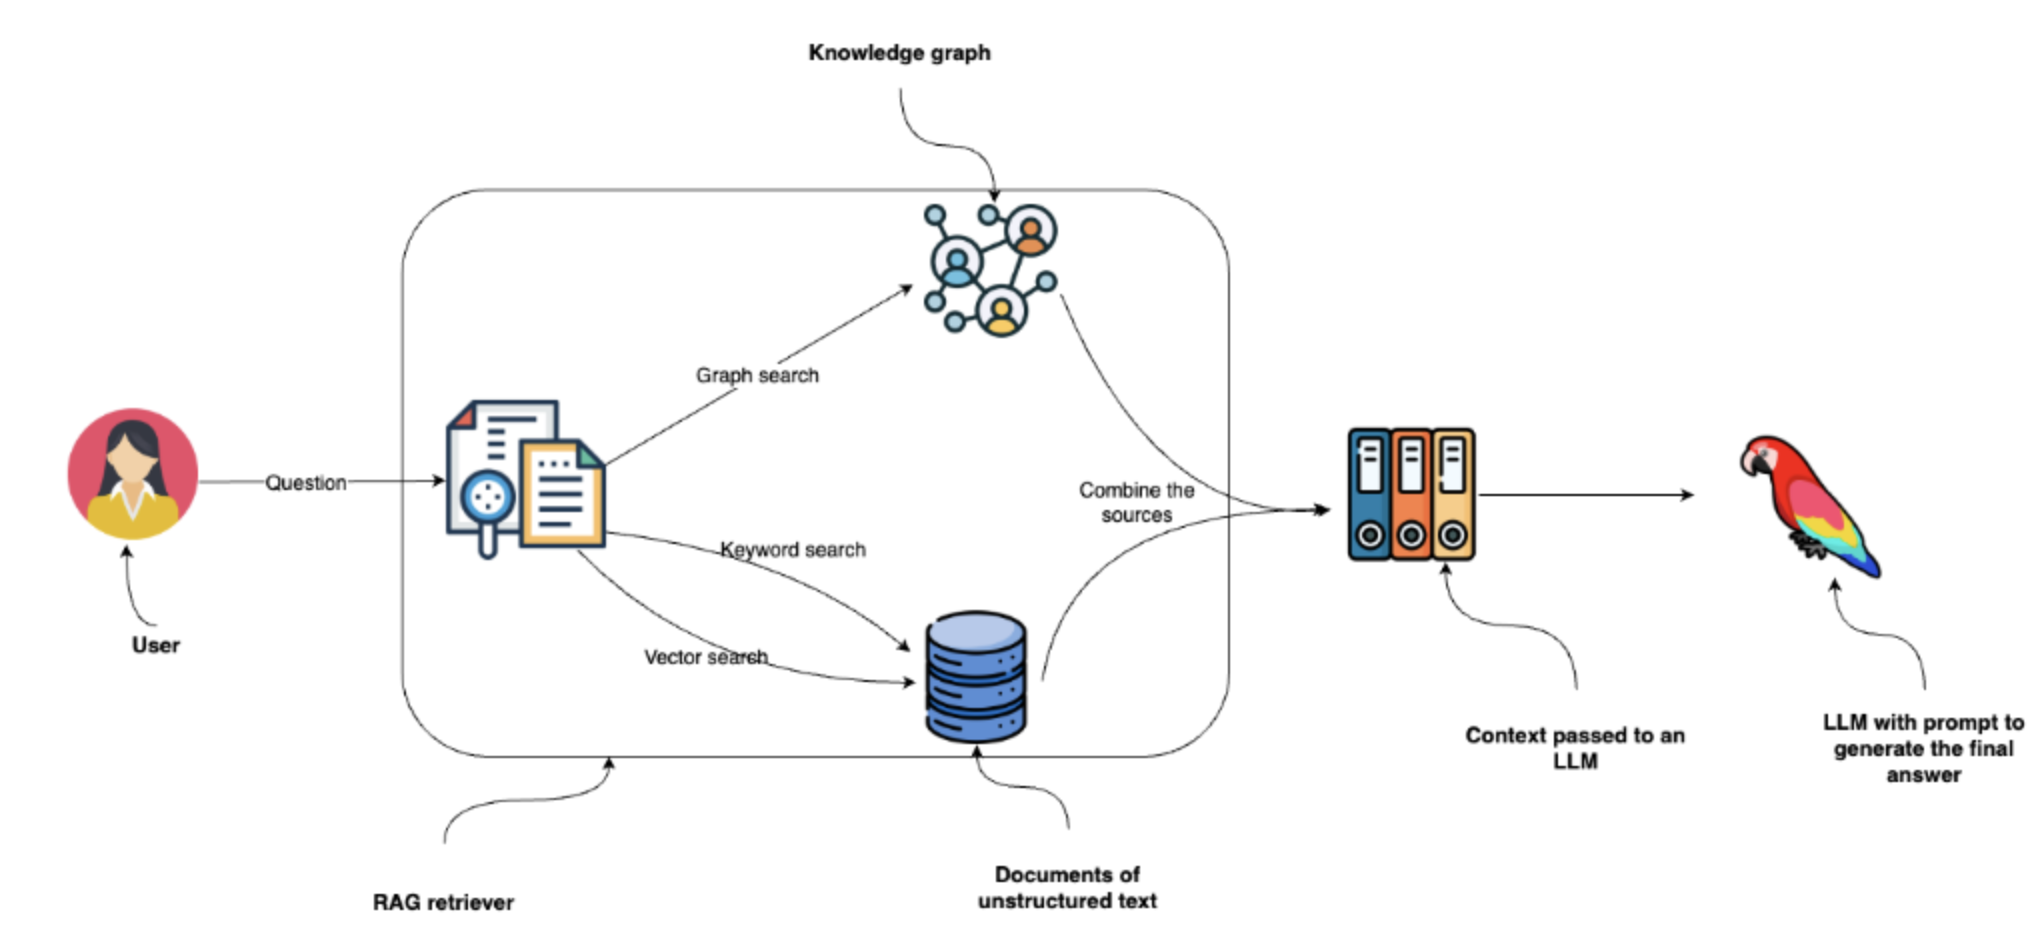

## 지식 그래프(Knowledge Graph) 개요

**정의**  
실세계의 개체(entity)와 이들 간의 관계(relationship)를 노드(node)와 엣지(edge)로 구조화하여 표현한 그래프 형태의 데이터베이스입니다.

---

### 주요 구성 요소

- **노드(Node)**  
  개체(Entity)를 나타냅니다.  
  예: 사람(Person), 장소(Place), 제품(Product), 개념(Concept) 등  

- **엣지(Edge)**  
  노드 간 관계(Relationship)를 나타냅니다.  
  예: **“Alice –[works_at]→ AcmeCorp”**, **“Paris –[capital_of]→ France”**  

- **속성(Properties)**  
  노드나 엣지가 가질 수 있는 추가 정보(메타데이터)입니다.  
  예: 생성일(created_at), 설명(description), 출처(source) 등  

---

### 지식 그래프 구축 단계

1. **데이터 수집**  
   - 텍스트 문서, 관계형 DB, API, 웹 크롤링 등 다양한 소스에서 원천 데이터 확보  
2. **개체 추출(NER)**  
   - 자연어 처리 기법으로 텍스트에서 명사구나 고유명사를 식별  
3. **관계 추출(RE)**  
   - 추출된 개체 간 의미 관계를 파악 (예: “works at”, “located in”)  
4. **정규화 및 통합**  
   - 유사 개체 병합, 중복 제거, 표준화된 식별자 매핑  
5. **그래프 저장 및 관리**  
   - Neo4j, Amazon Neptune, RDF 스토어 등 그래프 DB에 모델링하여 저장  

---

### 주요 용도 및 장점

- **시맨틱 검색(Semantic Search)**  
  단순 키워드 매칭을 넘어, 의미 기반으로 연관 정보를 효과적으로 검색  
- **추천 시스템(Recommendation)**  
  사용자의 속성·행동과 아이템 간 연결 관계를 활용한 정밀 추천  
- **데이터 통합(Data Integration)**  
  이질적 데이터 소스 간 연결고리를 만들어 데이터 연계·통합 용이  
- **추론 및 분석(Inference & Analytics)**  
  그래프 알고리즘(최단경로, 커뮤니티 탐지 등)을 통해 복잡한 패턴·관계 분석  

---

### 한계 및 고려사항

- **스케일(규모)**  
  엔티티·관계 수가 급증할수록 저장·탐색 성능 최적화 필요  
- **정확도 의존성**  
  NER/RE 성능이 낮으면 잘못된 노드·엣지가 생성되어 그래프 품질 저하  
- **갱신 관리(Update)**  
  실시간 또는 주기적 데이터 변경 반영 전략(증분 업데이트, 배치 재구축 등) 설계 필요  

---

### 주요 기술 및 도구

- **그래프 데이터베이스**: Neo4j, Amazon Neptune, JanusGraph  
- **표준 언어 & 프로토콜**: RDF, SPARQL, OWL  
- **라이브러리 & 프레임워크**: Apache Jena, RDFLib, TigerGraph, GraphX  


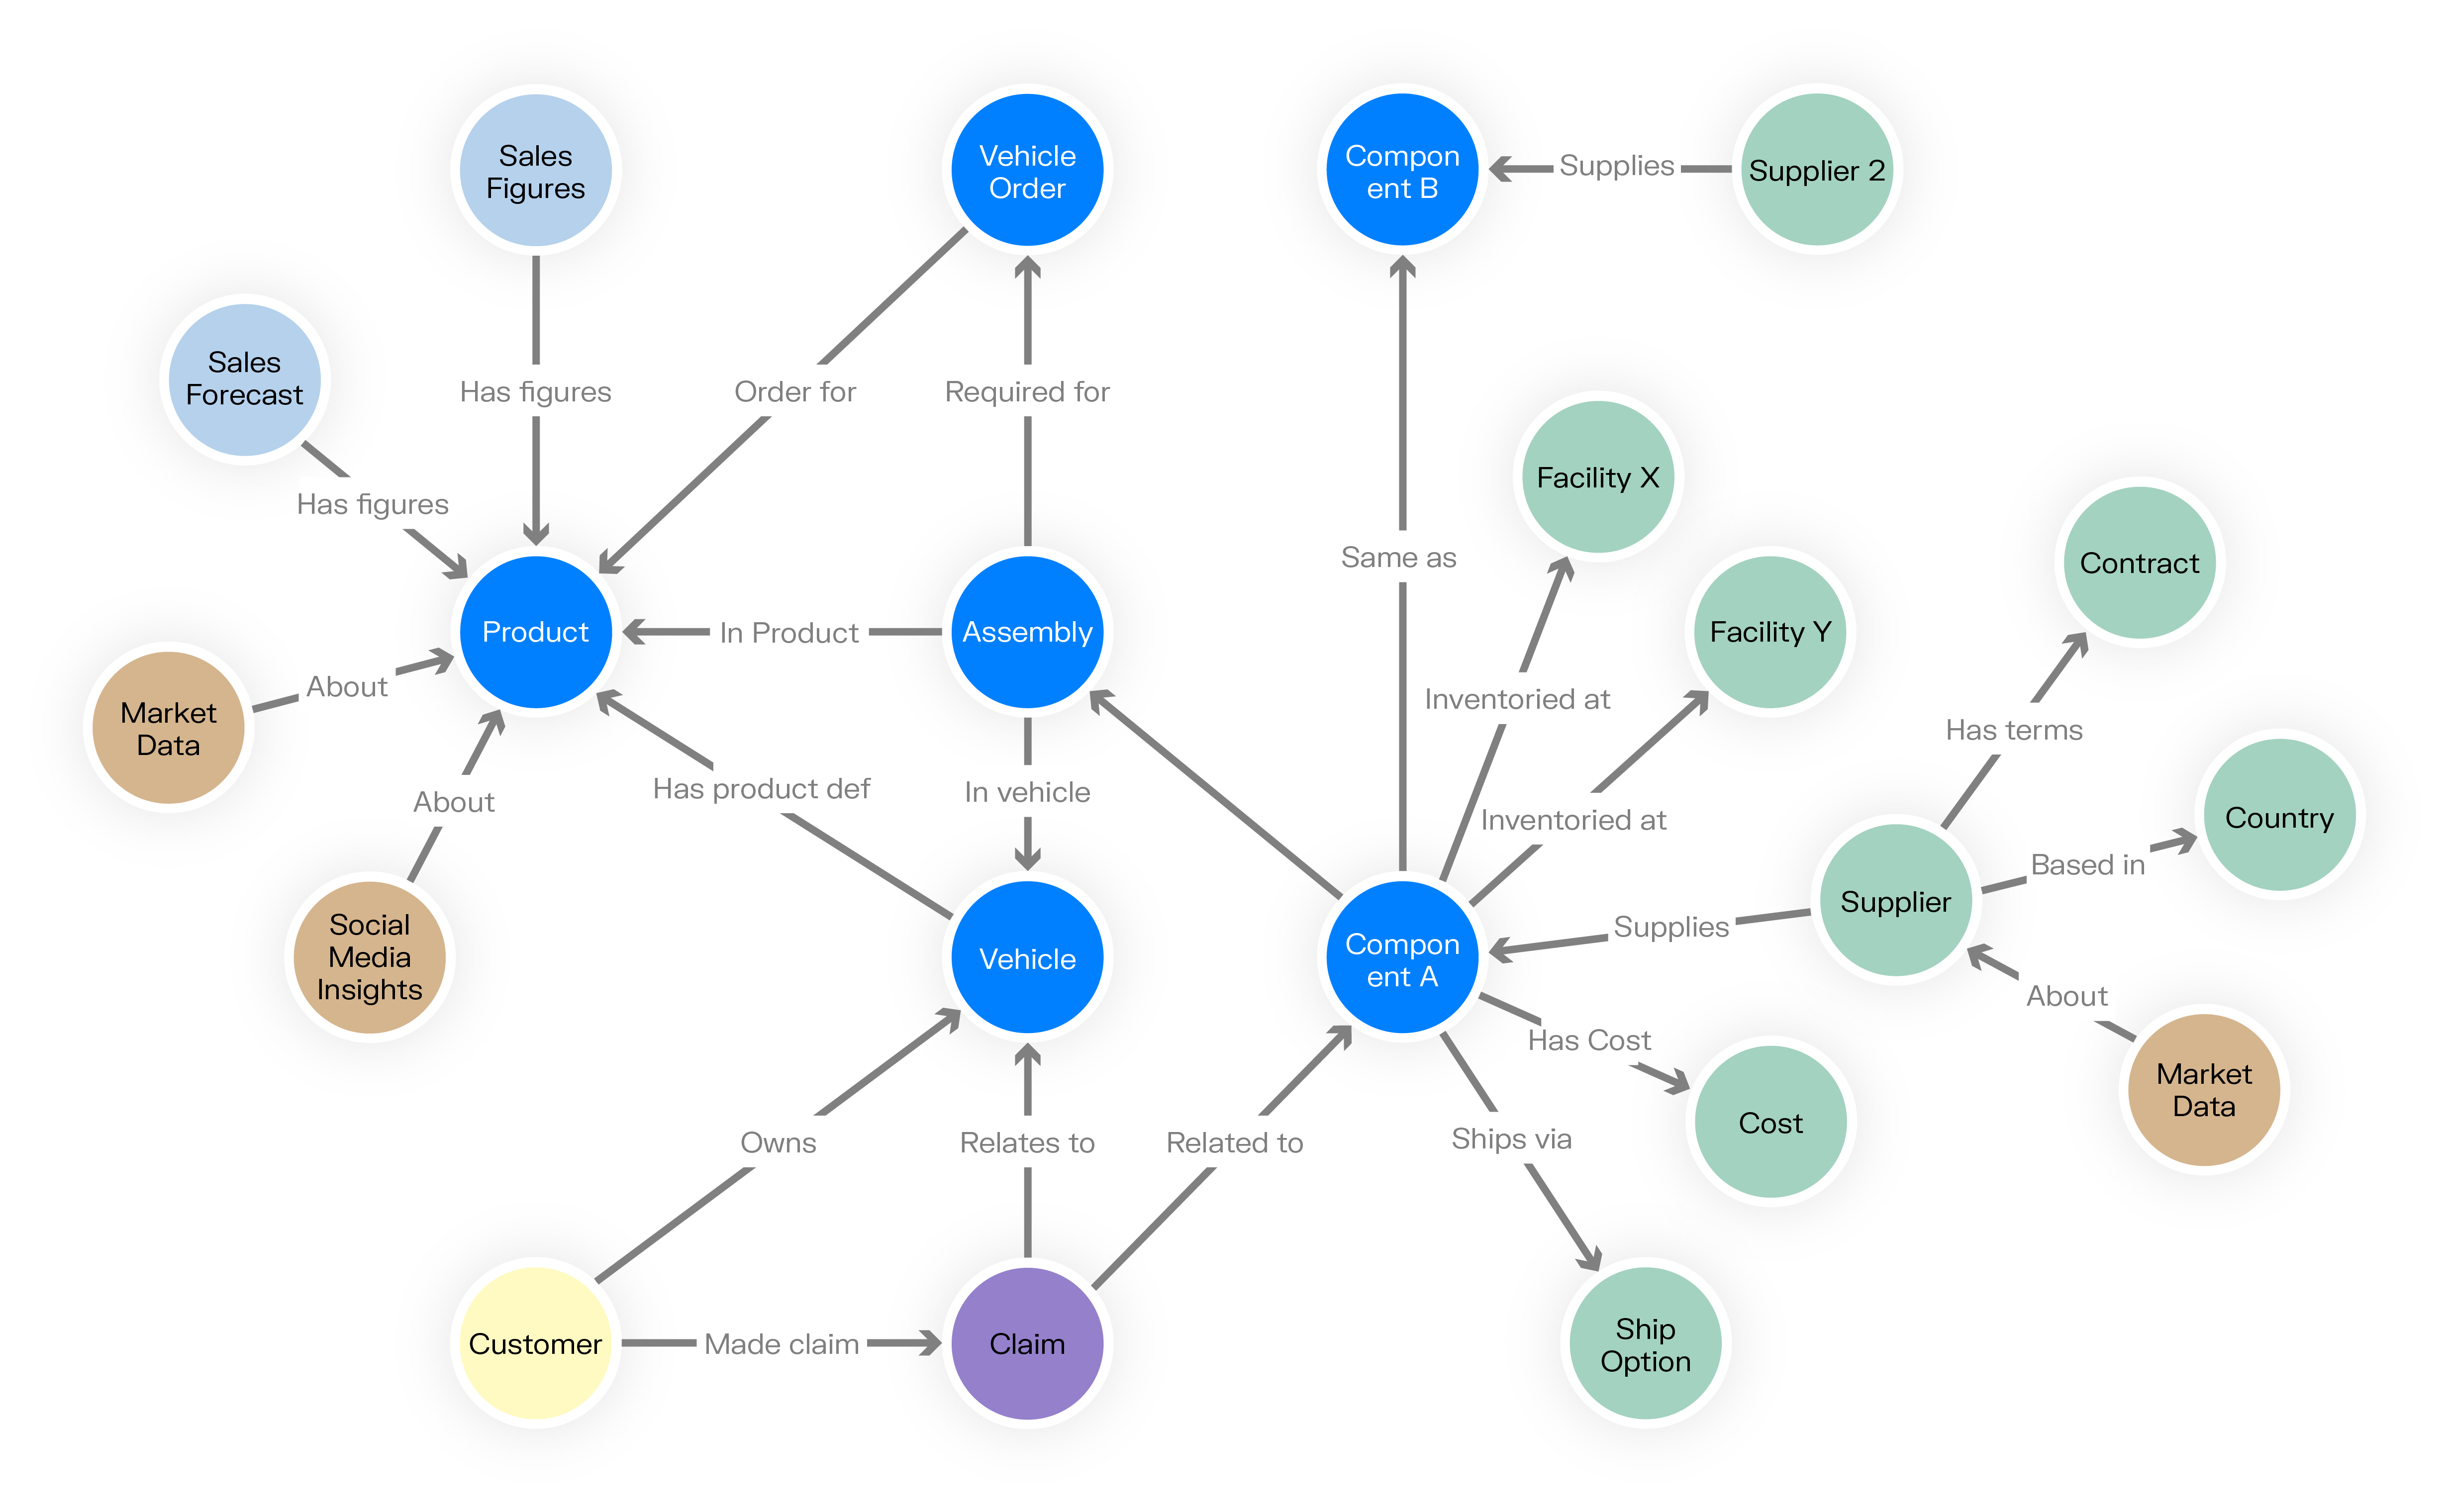

In [1]:
import os
from dotenv import load_dotenv
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain_openai import ChatOpenAI
from langchain_community.graphs.index_creator import GraphIndexCreator
from langchain_community.chains.graph_qa.base import GraphQAChain

# 1) 환경 변수 로드
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [2]:
# 2) PDF 파일 로드 및 Document 리스트 생성
pdf_folder = "personal"
docs = []
for fname in os.listdir(pdf_folder):
    if fname.lower().endswith(".pdf"):
        full_path = os.path.join(pdf_folder, fname)
        loader = PyPDFLoader(full_path)
        loaded = loader.load()
        print(f"Loaded {len(loaded)} pages from {fname}")
        docs.extend(loaded)

# 3) 문서 분할
splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
chunks = splitter.split_documents(docs)
print(f"Total chunks: {len(chunks)}")

# 4) 벡터 스토어 생성 (RAG용)
embeddings = OpenAIEmbeddings(
    model="text-embedding-3-small",
    openai_api_key=OPENAI_API_KEY
)
vectorstore = Chroma.from_documents(
    documents=chunks,
    embedding=embeddings,
    persist_directory="pdf_db",
    collection_name="pdf_chunks"
)
vectorstore.persist()
print("Vector DB stored with", vectorstore._collection.count(), "chunks")

Loaded 20 pages from Demystifying large language models in second language development research.pdf
Loaded 14 pages from dynamic social representations of the 2009 h1n1 pandemic.pdf
Loaded 12 pages from underachievement among gifted students of color.pdf
Loaded 25 pages from the scientific method as myth and ideal.pdf
Total chunks: 71


/var/folders/d8/_wvytdrs4371z5h2fwy9hdc00000gn/T/ipykernel_94454/3305109652.py:18: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  embeddings = OpenAIEmbeddings(


Vector DB stored with 71 chunks


/var/folders/d8/_wvytdrs4371z5h2fwy9hdc00000gn/T/ipykernel_94454/3305109652.py:28: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


In [3]:
# 5) 그래프 인덱스 생성
llm = ChatOpenAI(temperature=0, model_name="gpt-4o", openai_api_key=OPENAI_API_KEY)
index_creator = GraphIndexCreator(llm=llm)
# 모든 청크 텍스트 결합 (혹은 원하는 subset)
all_text = "\n\n".join(chunk.page_content for chunk in chunks)
graph = index_creator.from_text(all_text)
print("Graph built with nodes:", graph._graph.number_of_nodes(), "and edges:", graph._graph.number_of_edges())

# 6) 그래프 QA 체인 생성 및 질의
qa_chain = GraphQAChain.from_llm(
    llm=llm,
    graph=graph,
    verbose=True
)
query = "PDF 내용 기반으로 주요 개념 간 관계를 설명해줘."
answer = qa_chain.run(query)
print("Answer:", answer)

/var/folders/d8/_wvytdrs4371z5h2fwy9hdc00000gn/T/ipykernel_94454/665624699.py:16: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  answer = qa_chain.run(query)
Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Graph built with nodes: 49 and edges: 45
Entities Extracted:
NONE
Full Context:


> Finished chain.
Answer: I don't know.
